# Essence of Linear Algebra: Chapter-1

https://github.com/lesley2958/dod-math/blob/master/Math%20Matters.ipynb 

In [2]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')
from scipy import linalg
np.set_printoptions(suppress=True)

def plot_vectors(vs):
    """Plot vectors in vs assuming origin at (0,0)."""
    n = len(vs)
    X, Y = np.zeros((n, 2))
    U, V = np.vstack(vs).T
    plt.quiver(X, Y, U, V, range(n), angles='xy', scale_units='xy', scale=1)
    xmin, xmax = np.min([U, X]), np.max([U, X])
    ymin, ymax = np.min([V, Y]), np.max([V, Y])
    xrng = xmax - xmin
    yrng = ymax - ymin
    xmin -= 0.05*xrng
    xmax += 0.05*xrng
    ymin -= 0.05*yrng
    ymax += 0.05*yrng
    plt.axis([xmin, xmax, ymin, ymax])

### Coordinates

When we have a set of basis vectors $\left\{v_1,...,v_n\right\}$ for a vector space, as we have said, any vector may be represented as:

$$c_1v_1+...+c_nv_n$$

The $c_i's$ are called *coordinates*. For example, in the space of $2^{nd}$ degree polynomials, the vector:

$$2 x +\pi x^2$$

has coordinates $(0,2,\pi)$.

You probably think of coordinates in terms of the coordinate plane, and equate the coordinates with the $n$-tuples that label the points. This is all true - but skips a step. Now that we have separated our basis vectors from their coordinates, let's see how this applies in the case of the real vector spaces you are accustomed to.

The coordinates of the pictured vector (below) are $(2,3)$. But what does that mean? It means we have assumed the *standard basis*, $\left\{e_1,e_2\right\}$, and the vector $(2,3)$ really means:

$$2e_1 + 3e_2$$

where $e_1$ is a unit vector (length = 1) on the horizontal axis and $e_2$ is a unit vector along the vertical axis. This is a *choice of coordinates*. We could equally well choose the basis $\left\{v,e_2\right\}$ where $v$ is any vector that is linearly independent of $e_1$. Then all vectors would be considered of the form:

$$c_1 v + c_2 e_1$$.

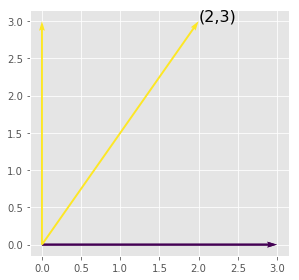

In [3]:
a1 = np.array([3,0])         # axis
a2 = np.array([0,3])

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([a1, a2])
v1 = np.array([2,3])
plot_vectors([a1,v1])
plt.text(2,3,"(2,3)",fontsize=16)
plt.tight_layout()

Note that in the standard basis, the coordinates of $e_1$ are $(1,0)$. This is because:

$$e_1 = 1\cdot e_1 + 0\cdot e_2$$

Similarly, the coordinates of $e_2$ are $(0,1)$ because

$$e_2 = 0\cdot e_1 + 1\cdot e_2$$

In the basis $\left\{v,e_1\right\}$, the coordinates of $e_1$ are $(0,1)$, because

$$e_1 = 0\cdot v + 1\cdot e_1$$

and the coordinates of $v$ are $(1,0)$.

Well need these concepts in a moment when we talk about change of basis.

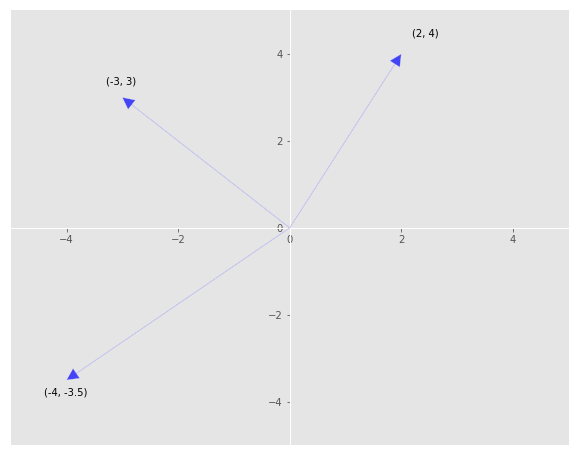

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
ax.grid()
vecs = ((2, 4), (-3, 3), (-4, -3.5))
for v in vecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.7,
                width=0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], str(v))
plt.show()

## Matrices and Linear Transformations
So we have this vector space and it consists of linear combinations of vectors. It's not terribly interesting just sitting there. So let's do something with it.

This is mathematics, and once mathematicians have objects collected into some set or 'space', we like to send them to other spaces, or back into the space itself, but changing one object into another. This is called a 'transformation'.

Let's suppose we have two vector spaces, $V$ and $W$. We'd like to define a transformation - but there is a catch. We want our transformation to act on all the vectors. Let's suppose $V=W=\mathbb{R}^2$. That seems simple enough. But there are still infinitely many vectors. Defining a transformation sounds laborious.

Ah, but we are clever. We have defined our space in such a way that for *certain* transformations, we need only define our transformation on a finite set (in the case of finite dimensional vector spaces).

### Linear Transformations

A linear transformation $f:V\rightarrow W$ is a map from $V$ to $W$ such that

$$f(c_1 v_1+c_2v_2) = c_1f(v_1)+c_2f(v_2)$$

Now, recall that a basis essentially generates the entire vector space via linear combinations. So, once we define a linear transformation $f$ on a basis, we have it for the whole space.


### Matrices, Transformations and Geometric Interpretation
Thinking back to real vector spaces, what does a matrix *do* to a vector?  Matrix multiplication has a *geometric* interpretation.  When we multiply a vector, we either rotate, reflect, dilate or some combination of those three. So multiplying by a matrix *transforms* one vector into another vector.  These are *linear transformations*. 

See the cell below for an example of a vector ($v_1 = (2,3)$) transformed by a matrix 

$$A = \left(\begin{matrix}2 & 1\\1&1\end{matrix}\right)$$

so that 

$$v_2 = Av_1$$

5


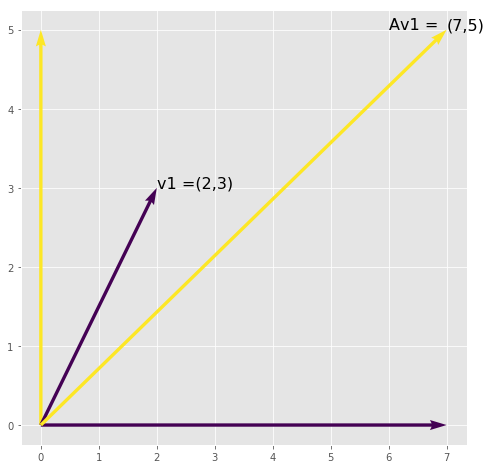

In [4]:
a1 = np.array([7,0])         # axis
a2 = np.array([0,5])
A = np.array([[2,1],[1,1]])  # transformation f in standard basis
v2 =np.dot(A,v1)
plt.figure(figsize=(8,8))
plot_vectors([a1, a2])
v1 = np.array([2,3])
plot_vectors([v1,v2])
plt.text(2,3,"v1 =(2,3)",fontsize=16)
plt.text(6,5,"Av1 = ", fontsize=16)
plt.text(v2[0],v2[1],"(7,5)",fontsize=16)
print(v2[1])

Important Facts: 

* Any matrix defines a linear transformation
* The matrix form of a linear transformation is NOT unique
* We need only define a transformation by saying what it does to a *basis*

Suppose we have a matrix $A$ that defines some transformation.  We can take any invertible matrix $B$ and

$$B^{-1}AB$$

defines the same transformation.  This operation is called a *change of basis*, because we are simply expressing the transformation with respect to a different basis.

This is an important concept in matrix decompositions.

### Example - Find *a* Matrix Representation of a Linear Transformation

Note that we say find 'a' matrix representation - not 'the' matrix representation. That is because the matrix representation is dependent on the *choice of basis*.

Let $f(x)$ be the linear transformation that takes $e_1=(1,0)$ to $f(e_1)=(2,3)$ and $e_2=(0,1)$ to $f(e_2) = (1,1)$.  A matrix representation of $f$ would be given by:

$$A = \left(\begin{matrix}2 & 1\\3&1\end{matrix}\right)$$

This is the matrix we use if we consider the vectors of $\mathbb{R}^2$ to be linear combinations of the form 

$$c_1 e_1 + c_2 e_2$$


### Example - Change to a Different Basis

Now, consider a second pair of (linearly independent) vectors in $\mathbb{R}^2$, say $v_1=(1,3)$ and $v_2=(4,1)$. We first find the transformation that takes $e_1$ to $v_1$ and $e_2$ to $v_2$.  A matrix representation for this is:

$$B = \left(\begin{matrix}1 & 4\\3&1\end{matrix}\right)$$


Our original transformation $f$ can be expressed with respect to the basis $v_1, v_2$ via

$$B^{-1}AB$$

Here is what the new basis looks like:

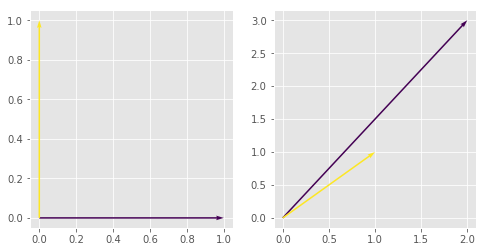

In [5]:
# new basis
e1 = np.array([1,0])
e2 = np.array([0,1])
A = np.array([[2,1],[3,1]])
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([e1, e2])
plt.subplot(1,2,2)
plot_vectors([A.dot(e1), A.dot(e2)])
plt.Circle((0,0),2)

Let's see what the new matrix looks like:

In [6]:
A = np.array([[2,1],[3,1]])  # transformation f in standard basis
e1 = np.array([1,0])         # standard basis vectors e1,e2
e2 = np.array([0,1])

print(A.dot(e1))             # demonstrate that Ae1 is (2,3)
print(A.dot(e2))             # demonstrate that Ae2 is (1,1) 
                              
# new basis vectors
v1 = np.array([1,3])         
v2 = np.array([4,1])

# How v1 and v2 are transformed by A
print("Av1: ")
print(A.dot(v1))   
print("Av2: ")
print(A.dot(v2))

# Change of basis from standard to v1,v2
B = np.array([[1,4],[3,1]])
print(B)
B_inv = linalg.inv(B)

print("B B_inv ")
print(B.dot(B_inv))   # check inverse

# Matrix of the transformation with respect to the new basis
T = B_inv.dot(A.dot(B))        # B^{-1} A B 

print(T)

T.dot(e1)[0]*v1 + T.dot(e1)[1]*v2

[2 3]
[1 1]
Av1: 
[5 6]
Av2: 
[ 9 13]
[[1 4]
 [3 1]]
B B_inv 
[[ 1.  0.]
 [ 0.  1.]]
[[ 1.7273  3.9091]
 [ 0.8182  1.2727]]


array([ 5.,  6.])

## What does all this have to do with linear systems?

#### Linear Independence:

* If $A$ is an $m\times n$ matrix and $m>n$, if all $m$ rows are linearly independent, then the system is *overdetermined* and *inconsistent*.  The system cannot be solved exactly.  This is the usual case in data analysis, and why least squares is so important.
 
* If $A$ is an $m\times n$ matrix and $m<n$, if all $m$ rows are linearly independent, then the system is *underdetermined* and there are *infinite* solutions.

* If $A$ is an $m\times n$ matrix and some of its rows are linearly dependent, then the system is *reducible*.  We can get rid of some equations.

* If $A$ is a square matrix and its rows are linearly independent, the system has a unique solution. ($A$ is invertible.)

#### Change of Basis

* We can often transform a linear system into a simpler form, simply via a change of basis.

## Inner Products
Inner products are closely related to norms and distance.  
The (standard) inner product (or dot product) of two $n$ dimensional vectors $v$ and $w$ is given by:

$$<v,w> = v_1w_1+...+v_nw_n$$

I.e. the inner product is just the sum of the product of the components.  Certain 'special' matrices also define inner products, and we will see some of those later.

The standard inner product is related to the standard norm via:

$$||v|| = <v,v>^{\frac12}$$


#### Geometric Interpretation:

The inner product of two vectors is proportional to the cosine of the angle between them. In fact:

$$<v,w> = ||v|| ||w|| \cos(\theta)$$

where $\theta$ is the angle between $v$ and $w$.

<unbound method Circle.draw>

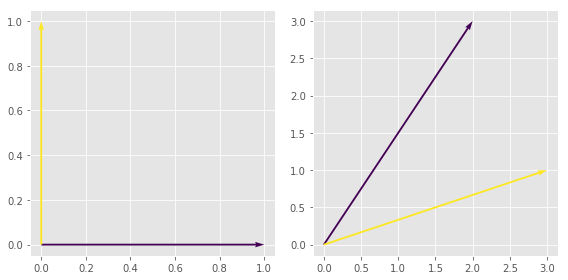

In [7]:
e1 = np.array([1,0])
e2 = np.array([0,1])
A = np.array([[2,3],[3,1]])
v1=A.dot(e1)
v2=A.dot(e2)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([e1, e2])
plt.subplot(1,2,2)
plot_vectors([v1,v2])
plt.tight_layout()
#help(plt.Circle)
plt.Circle(np.array([0,0]),radius=1)
plt.Circle.draw

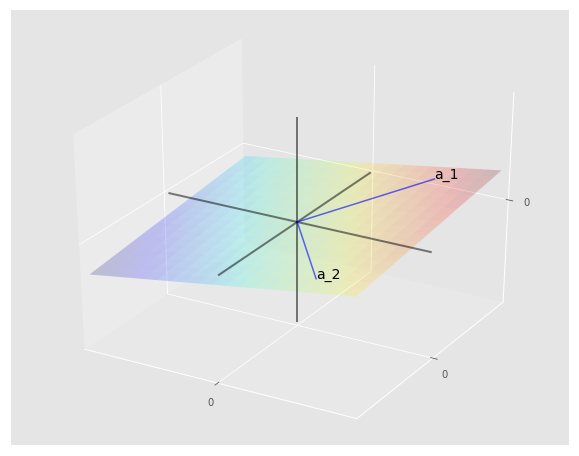

In [20]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp2d
 

fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')

x_min, x_max = -5, 5
y_min, y_max = -5, 5

al = 0.2 
be = 0.1

ax.set(xlim=(x_min, x_max), ylim=(x_min, x_max), zlim=(x_min, x_max),
       xticks=(0,), yticks=(0,), zticks=(0,))

gs = 3
z = np.linspace(x_min, x_max, gs)
x = np.zeros(gs)
y = np.zeros(gs)
ax.plot(x, y, z, 'k-', lw=2, alpha=0.5)
ax.plot(z, x, y, 'k-', lw=2, alpha=0.5)
ax.plot(y, z, x, 'k-', lw=2, alpha=0.5)


# Fixed linear function, to generate a plane
def f(x, y):
    return al * x + be * y

# Vector locations, by coordinate
x_coords = np.array((3, 3))
y_coords = np.array((4, -4))
z = f(x_coords, y_coords)
for i in (0, 1):
    label = 'a_'+ str(i+1)
    ax.text(x_coords[i], y_coords[i], z[i], label, fontsize=14)

# Lines to vectors
for i in (0, 1):
    x = (0, x_coords[i])
    y = (0, y_coords[i])
    z = (0, f(x_coords[i], y_coords[i]))
    ax.plot(x, y, z, 'b-', lw=1.5, alpha=0.6)


# Draw the plane
grid_size = 20
xr2 = np.linspace(x_min, x_max, grid_size)
yr2 = np.linspace(y_min, y_max, grid_size)
x2, y2 = np.meshgrid(xr2, yr2)
z2 = f(x2, y2)
ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.jet,
                linewidth=0, antialiased=True, alpha=0.2)
plt.show()

In [8]:
#solving for AX=B
import numpy as np 

# Defining matrixes
A = np.matrix([[1,1], [2,4]])
B = np.matrix([[35], [94]])

# Taking inverse of A
A_inverse = np.linalg.inv(A)

# Solving for X
X = A_inverse * B 
print X

[[ 23.]
 [ 12.]]
